<!--
---
title: "Unsupervised learning"
author: "Darya Vanichkina, Madhura Killedar"
keypoints:
- Unsupervised learning is an approach where we use machine learning to search for patterns in the data 
source: Rmd
start: 0
teaching: 30
exercises: 0
---

-->

## Unsupervised learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.utils import resample


# Set up plotting options for seaborn and matplotlib
sns.set_context('notebook') 
sns.set_style('ticks') 
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

## Dataset
We will be using the Iris dataset in order to demo unsupervised learning methods

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


There are three species (our target label)

In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
iris_features = iris.iloc[:,0:4]
iris_target = iris.iloc[:,4]
print(iris_features.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


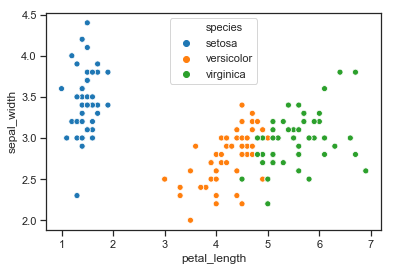

In [5]:
_ = sns.scatterplot(x='petal_length',y='sepal_width', data=iris, hue=iris_target)

> ## Challenge 1
>
> 1. Take a few moments to explore the Iris dataset. What can you learn? Which species do you think will be easier to separate?
>
{: .challenge}

## K-means clustering
K-means looks for a fixed number (k) of clusters in a dataset. The K-means algorithm:
- identifies k number of centroids
- allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
- performs iterative (repetitive) calculations to optimize the positions of the centroids

### scale data

In [7]:
iris_features_sc = RobustScaler().fit_transform(iris_features)

### Try 2 clusters

In [8]:
model_kmeans_k2 = KMeans(n_clusters=2, random_state=0)
labels_k2 = model_kmeans_k2.fit_predict(iris_features_sc)

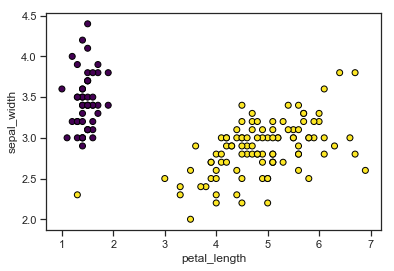

In [9]:
_ = plt.scatter(iris['petal_length'], iris['sepal_width'], c=labels_k2, cmap='viridis', edgecolor='k')
_ = plt.xlabel('petal_length')
_ = plt.ylabel('sepal_width')

### Try 3 clusters

In [10]:
model_kmeans_k3 = KMeans(n_clusters=3, random_state=0)
labels_k3 = model_kmeans_k3.fit_predict(iris_features_sc)

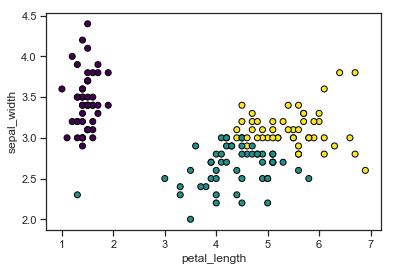

In [11]:
_ = plt.scatter(iris['petal_length'], iris['sepal_width'], c=labels_k3, cmap='viridis', edgecolor='k')
_ = plt.xlabel('petal_length')
_ = plt.ylabel('sepal_width')

> ## Challenge 2
>
> 1. Which features best appear to separate the species? 
> 
{: .challenge}

### Optimal number of clusters
One of the trickier tasks in clustering is identifying the appropriate number of clusters k.

In [12]:
from scipy.spatial.distance import cdist

k_range = np.arange(2,12)
silhouette_avgs = []
sum_squared_distances = []

for i, k in enumerate(k_range):
    model_kmeans = KMeans(n_clusters=k, random_state=2)
    label_kmeans = model_kmeans.fit_predict(iris_features_sc)
    silhouette_avgs.append(silhouette_score(iris_features_sc, label_kmeans))    
    sum_squared_distances.append(model_kmeans.inertia_)

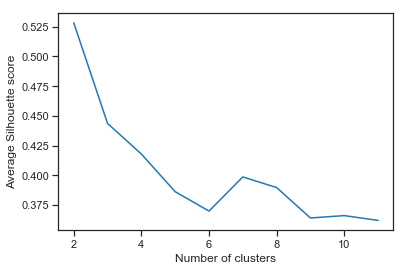

In [13]:
# Look for maximum
_ = plt.plot(k_range, silhouette_avgs)
_ = plt.ylabel('Average Silhouette score') 
_ = plt.xlabel('Number of clusters')

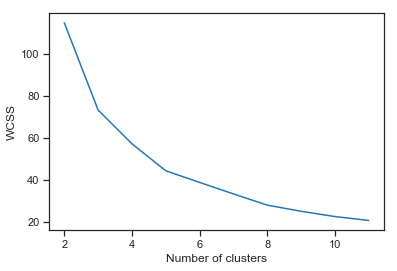

In [14]:
# look for elbow. Also known as Scree plot
_ = plt.plot(k_range, sum_squared_distances)
_ = plt.ylabel('WCSS') #within cluster sum of squared distances
_ = plt.xlabel('Number of clusters')

## Hierarchical Clustering

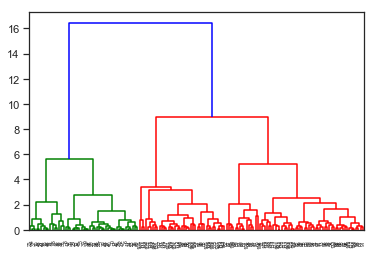

In [15]:
linked = linkage(iris_features_sc, method='ward')

dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [16]:
model_hclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
iris_hc = model_hclust.fit(iris_features_sc)
#model_hclust.fit_predict(iris_features_sc)

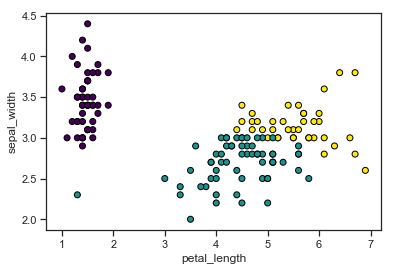

In [17]:
_ = plt.scatter(iris['petal_length'], iris['sepal_width'], c=model_hclust.labels_, cmap='viridis', edgecolor='k')
_ = plt.xlabel('petal_length')
_ = plt.ylabel('sepal_width')

### plotting data

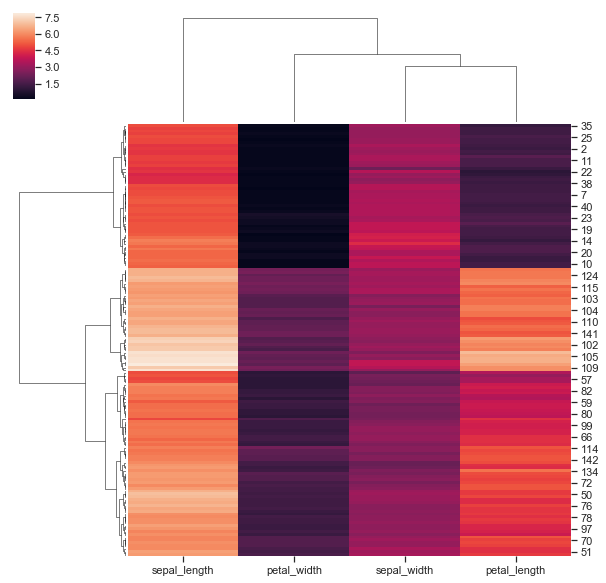

In [18]:
_ = sns.clustermap(iris_features, method='ward')

## Principal Component Analysis (PCA)

In [22]:
nPCs = 3
PCnames = ['PC1','PC2','PC3']
iris_pca = PCA(n_components=nPCs).fit(iris_features)
iris_reduced = iris_pca.fit_transform(iris_features)

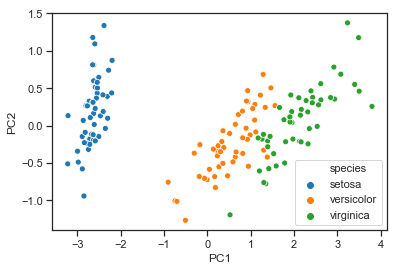

In [23]:
iris_PC_df = pd.DataFrame(iris_reduced, columns = PCnames)
_ = sns.scatterplot(x='PC1',y='PC2', data=iris_PC_df, hue=iris_target)

### Eigenvalues

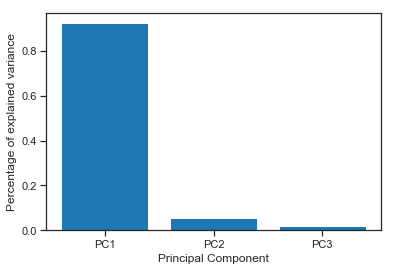

In [24]:
iris_eig = iris_pca.explained_variance_ratio_

x = np.arange(nPCs)
fig, ax = plt.subplots()
plt.bar(x, iris_eig)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.xticks(x, PCnames)
_ = plt.show()

In [25]:
iris_comp = iris_pca.components_
#print(iris_comp)

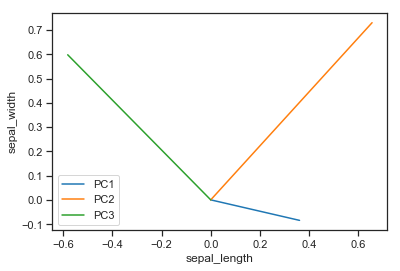

In [26]:
origin = [0], [0] # origin point
for pc in np.arange(nPCs):
    plt.plot([0,iris_comp[pc,0]], [0,iris_comp[pc,1]], label=PCnames[pc])
plt.xlabel(iris_features.columns[0])
plt.ylabel(iris_features.columns[1])
plt.legend()
_ = plt.show()

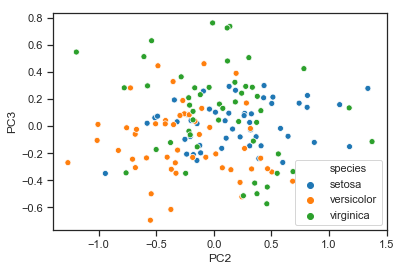

In [27]:
_ = sns.scatterplot(x='PC2',y='PC3', data=iris_PC_df, hue=iris_target)

## t-SNE

In [28]:
model_tsne = TSNE(n_components=2, perplexity=25)
iris_tsne = model_tsne.fit_transform(iris_features)

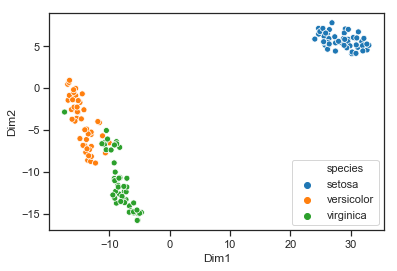

In [29]:
iris_TSNE_df = pd.DataFrame(iris_tsne, columns = ['Dim1','Dim2'])
_ = sns.scatterplot(x='Dim1',y='Dim2', data=iris_TSNE_df, hue=iris_target)